# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [22]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    station_locations_by_hash = df['hash']
    station_locations_by_hash = df[df['hash'] == hashid]
    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')







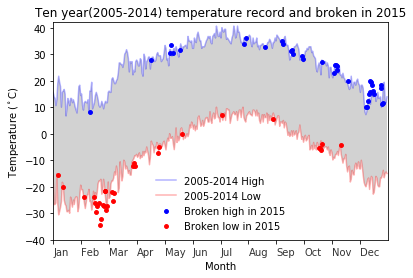

In [1]:
#packages needed 
import pandas as pd
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt




#1.Read the csv file 
weather = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#convert tenth of celccius to celcius to make the plot more readable in general degress
weather['Data_Value'] = weather['Data_Value']*0.1 
#get month and day of each year through date time index  and dayofyear(1-365)
weather['month'] = pd.DatetimeIndex(weather['Date']).month 
weather['day'] = pd.DatetimeIndex(weather['Date']).day
weather['dayofyear'] =pd.DatetimeIndex(weather['Date']).dayofyear 

#2. select the leap day (as 2015 is not a leap year to which we want to compare the trend
#and divide dataset into two group 2015 and less than 2015 (2005-2014)
weather['year'] = weather['Date'].apply(lambda x: x[0:4]) 
weather['Date2'] = weather['Date'].apply(lambda x: x[-5:])
weather = weather[weather['Date2'] != '02-29'] 
weather2015 = weather[weather['year'] == '2015'] 
weather2014 = weather[~(weather['year'] == '2015')]

#3. sort the dataframe on the basis of month and the day 
weather2014 = weather2014.set_index(['month','day'])
weather2014 = weather2014.sort_index()

#4. get two dataframes depending upon MAX and MIN columns to get corresponding values  for 2005-2014
df_max = weather2014[weather2014['Element'] == 'TMAX'] 
df_min = weather2014[weather2014['Element'] == 'TMIN'] #
groupby_max = df_max.groupby(level = ['month','day'])['Data_Value'].max() 
groupby_min = df_min.groupby(level = ['month','day'])['Data_Value'].min()

#5. Similar things for 2015 
weather2015 = weather2015.set_index(['month','day'])
weather2015 = weather2015.sort_index()
df_max_2015 = weather2015[weather2015['Element'] == 'TMAX'] 
df_min_2015 = weather2015[weather2015['Element'] == 'TMIN'] 
#agg function to keep other columns too by groupby and as_index = True to keep the index , we need this
#here because on finidng larger or smaller values we loose the information of the days of the year.
groupby_max_2015 = df_max_2015.groupby(level = ['month','day'],as_index=True).agg({'Data_Value' : max, 'dayofyear': 'first'}) 
groupby_min_2015 = df_min_2015.groupby(level = ['month','day'],as_index=True).agg({'Data_Value' : min, 'dayofyear': 'first'})           

#calculate the high and low recored in 2015 comapring to 2005-2014
high_record_break = groupby_max_2015[groupby_max_2015['Data_Value'] > groupby_max.values]
low_record_break  = groupby_min_2015[groupby_min_2015['Data_Value'] < groupby_min.values ]


#Plot Visualization
plt.figure(figsize=(10,7))
plt.figure()

t= groupby_min.index.values

plt.plot(groupby_max.values, '-k', c = 'blue', alpha=0.3,label ='2005-2014 High')
plt.plot(groupby_min.values, '-k', c = 'red',alpha=0.3 ,label ='2005-2014 Low')
#plt.plot(groupby_min.values, c= 'red', groupby_max.values, c= 'blue')
plt.gca().fill_between( range(len(groupby_min)),groupby_min, groupby_max,
                        facecolor='grey',alpha=0.35)
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Ten year(2005-2014) temperature record and broken in 2015')
#add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend()
plt.scatter(high_record_break['dayofyear'],high_record_break['Data_Value'], s = 15,c='blue',label='Broken high in 2015')
plt.scatter(low_record_break['dayofyear'],low_record_break['Data_Value'], s= 15, c='r',label='Broken low in 2015')
ax=plt.gca() 
ax.axis([0.2,365.1,-40,42])
plt.xticks(np.linspace(0,365,13)[:-1],['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],alpha=0.8,horizontalalignment='left' )
plt.legend(loc=0,frameon = False)
#plt.savefig('weather.pdf')
plt.show()






